<a href="https://colab.research.google.com/github/MelanySaez/Melany/blob/main/notebooks/00_Linear_algebra_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra with Numpy

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar

Based on the jupyter notebook by [Vince Knight](https://github.com/drvinceknight/Python-Mathematics-Handbook)

Many computer vision algorithms require numeric computations performed with matrices and these are best solved with [Numpy](http://www.numpy.org/) a high performance numerical computing library.

Here is how it is described:

> NumPy is the fundamental package for scientific computing with Python. It contains among other things: [...]
 useful linear algebra, Fourier transform, and random number capabilities.

This notebook is a way to review several linear algebra concepts and to get acquainted with their computation in Python. In this section we will see how to:

- Manipulate matrices;
- Solve Matrix equations;
- Calculate Matrix inverse and determinants.

## Manipulating matrices

It is straightforward to create a Matrix using Numpy. Let us consider the following as a examples:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


First, we need to import Numpy:

In [9]:
import numpy as np

Now we can define $A$:

In [ ]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [ ]:
A

array([[ 5,  6,  2],
       [ 4,  7, 19],
       [ 0,  3, 12]])

In [11]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [ ]:
B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [ ]:
5 * A

array([[25, 30, 10],
       [20, 35, 95],
       [ 0, 15, 60]])

In [ ]:
A ** 3

array([[ 125,  216,    8],
       [  64,  343, 6859],
       [   0,   27, 1728]])

In [ ]:
A + B

array([[19,  4, 14],
       [ 8, 11, 24],
       [ 5,  8, 13]])

In [ ]:
A - B

array([[ -9,   8, -10],
       [  0,   3,  14],
       [ -5,  -2,  11]])

In [ ]:
A @ B

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

**Matrix multiplication.** Unfortunately, there are many ways to do [matrix multiplication in Python](https://blog.finxter.com/numpy-matmul-operator/ "NumPy Matrix Multiplication — np.matmul() and @ [Ultimate Guide] | Finxter"). The suggested way is to used the `@` operator because the `*` does not perform matrix multiplication.

Check that `np.dot(A, B)` produces the same result.

In [ ]:
np.dot(A, B)

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

---

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

---

In [10]:
# Write here the solution

# Definir la matriz A
A = np.array([[1, -1],
              [2, 1]])

# Calcular la expresión: A^2 - 2A + 3
# A @ A: multiplicación de matrices (A^2)
# - 2 * A: multiplicación escalar por 2
# + 3: suma el escalar 3 a cada elemento de la matriz resultante
result = A @ A - 2 * A + 3

# Mostrar la matriz resultante
print("La matriz resultante es:\n",result)

La matriz resultante es:
 [[0 3]
 [3 0]]


## Solving Matrix equations

We can use Numpy to (efficiently) solve large systems of equations of the form:

$$Ax=b$$

Let us illustrate that with:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$

In [12]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.array([[-1], [2], [1]])

We use the `linalg.solve` command:

In [ ]:
x = np.linalg.solve(A, b)
x

array([[ 0.45736434],
       [-0.62790698],
       [ 0.24031008]])

We can verify our result:

In [ ]:
A @ x

array([[-1.],
       [ 2.],
       [ 1.]])

---

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

---

In [13]:
# Write the solution here

# Matriz B ya definida
# Matriz b ya definida

# Resolver el sistema B * x = b usando álgebra lineal
# np.linalg.solve devuelve el vector x que satisface la ecuación
x = np.linalg.solve(B, b)

# Verificar el resultado
verificacion = B @ x  # Multiplicación de matrices

print("Solución x:\n", x)
print("\nB @ x:\n", verificacion)
print("\nb:\n", b)

# Comprobar si son iguales
print("\n¿La solución es correcta?:", np.allclose(verificacion, b))

Solución x:
 [[-0.25892857]
 [ 0.40178571]
 [ 0.28571429]]

B @ x:
 [[-1.]
 [ 2.]
 [ 1.]]

b:
 [[-1]
 [ 2]
 [ 1]]

¿La solución es correcta?: True


## Matrix inversion and determinants

Computing the inverse of a matrix is straightforward:

In [18]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.20930233,  0.51162791, -0.7751938 ],
       [ 0.37209302, -0.46511628,  0.6744186 ],
       [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [19]:
A @ Ainv

array([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
       [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
       [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

The above might not look like the identity matrix but if you look closer you see that the diagonals are all `1` and the off diagonals are a **very** small number (which from a computer's point of view is `0`).

We can also verify that `A @ Ainv` is close to the identity matrix `np.eye()` using the `np.allclose()` command.

In [ ]:
# Run this command to check that A @ Ainv is close to I
np.allclose(A @ Ainv, np.eye(3,3))

True

To calculate the determinant:

In [ ]:
np.linalg.det(A)

-129.00000000000009

---

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

---

In [21]:
# Write the solution here

# Calcular la inversa de B
Binv = np.linalg.inv(B)

# Multiplicar B por su inversa (B * B^(-1))
# El resultado teóricamente debe ser la matriz identidad
producto = B @ Binv
print("B * B^(-1):\n", producto)

# Verificar si el resultado es la matriz identidad
es_identidad = np.allclose(producto, np.eye(3, 3))
print("\n¿B * B^(-1) es la identidad?:", es_identidad)

# Calcular el determinante de B
det_B = np.linalg.det(B)
print("\nDeterminante de B:", det_B)

B * B^(-1):
 [[ 1.00000000e+00  0.00000000e+00  1.11022302e-16]
 [ 7.55253758e-19  1.00000000e+00  8.32667268e-17]
 [ 4.45599717e-17 -3.33066907e-16  1.00000000e+00]]

¿B * B^(-1) es la identidad?: True

Determinante de B: -336.0


## Rotations

Rotation is a fundamental operation in computer graphics, robotics, and many other fields. In this exercise, you will create a 2D rotation matrix and apply it to a set of points.



Generate a set of points in 2D forming a square. You can do this manually or use the `np.mgrid` function.

In [59]:
points = np.array([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])

Create a function that returns a 2D rotation matrix given an angle in degrees. The rotation matrix for a counterclockwise rotation by an angle $\theta$ in 2D is:

\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\\\
\sin(\theta) & \cos(\theta)
\end{bmatrix}


In [60]:
# Here is the function
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


Apply the rotation matrix to the set of points for a few different angles (e.g., 45, 90, 180 degrees) and plot the original points and the transformed points using `plt.plot()`. You should see the square rotate.

Dont'forget to import matplotlib for plotting.

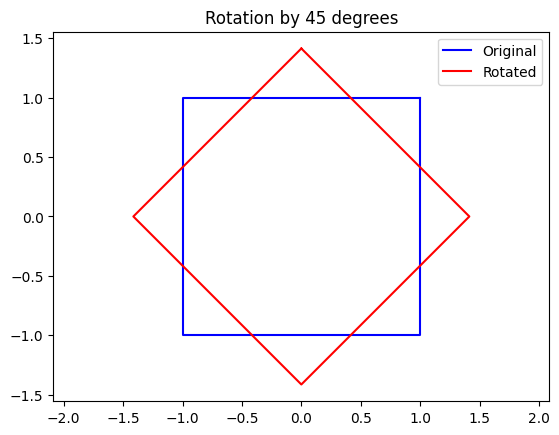

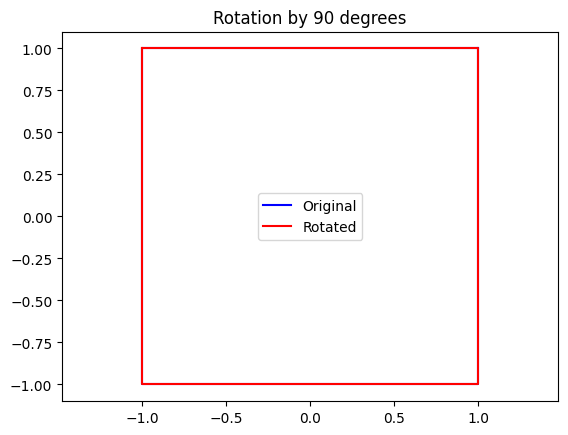

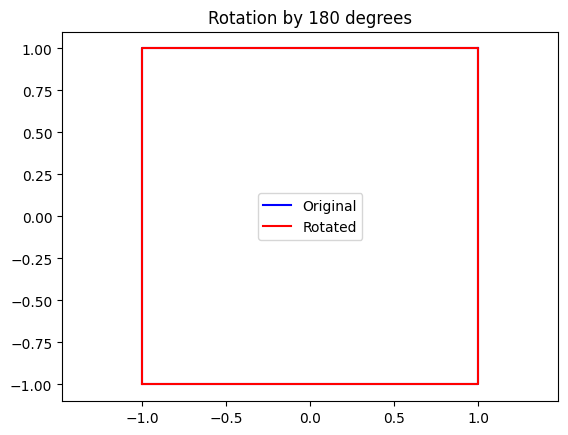

In [61]:
import matplotlib.pyplot as plt

for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_points = R @ points
    plt.figure()
    plt.plot(points[0, :], points[1, :], 'b-', label='Original')
    plt.plot(rotated_points[0, :], rotated_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()


---

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.

---

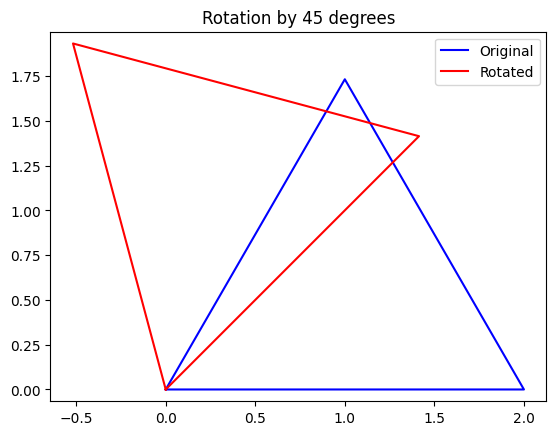

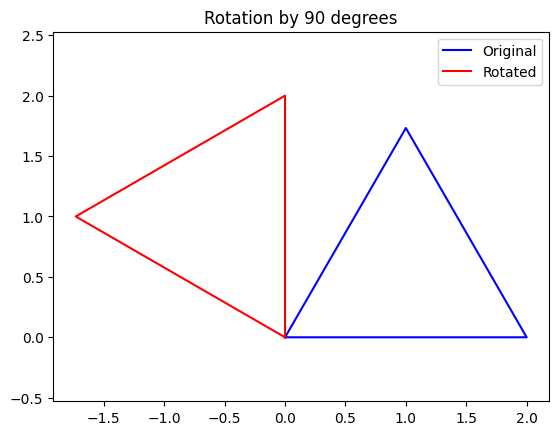

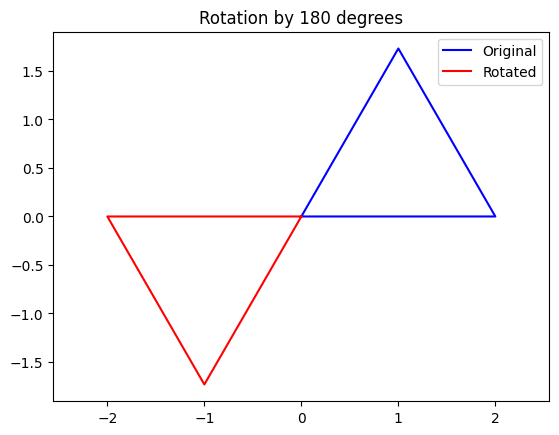

In [62]:
# Write the solution here

#Puntos del triangulo
points = np.array([[0,  2,  1, 0], [0,  0,  1.732, 0]])

#Función para generar matriz de rotación ya definida

## Rotar el triángulo para distintos ángulos
for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_points = R @ points
    plt.figure()
    plt.plot(points[0, :], points[1, :], 'b-', label='Original')
    plt.plot(rotated_points[0, :], rotated_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()

## Exercise for Graduate students: Image Compression and Reconstruction using SVD

Use Singular Value Decomposition (SVD) to compress and reconstruct an image, exploring the trade-offs between compression ratio and image quality. This exercise will highlight the utility of SVD in practical image processing tasks.

### Steps

#### 1. Image Preparation
- Load a grayscale image into a Numpy array.
- Display the original image.

#### 2. Applying SVD
- Perform SVD on the image matrix to obtain U, Σ, and V^T.
- Display the shapes of U, Σ, and V^T.

#### 3. Image Compression
- Choose a set of singular values (e.g., first 10, 20).
- Reconstruct the image using only the chosen singular values.
- Repeat with different numbers of singular values to explore different compression levels.

#### 4. Visualization and Analysis
- Display original and compressed images side by side.
- Discuss the compression ratio and impact on image quality for each compression level.

#### 5. Advanced Exploration (Optional)
- Test the compression on different image types.
- Explore SVD in noise reduction by altering singular values before reconstruction.

### Requirements
- Use Numpy for SVD and matrix operations.
- Use matplotlib or similar for image handling.
- Provide explanations for each step, emphasizing the principles and applications of SVD.

Imagen cargada. shape = (512, 512) rango = (np.float64(0.09803921568627451), np.float64(0.9607843137254902))
Shapes: U: (512, 512) S: (512,) Vt: (512, 512)


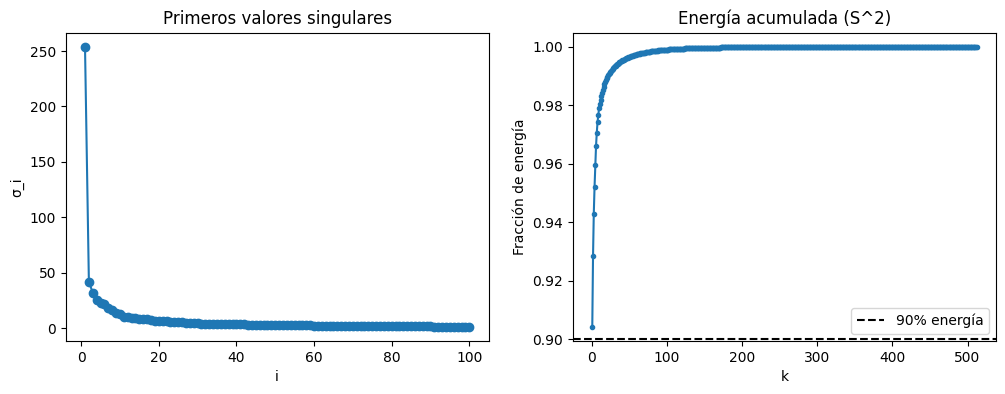

k=   5 | MSE=1.1017e-02 | PSNR=19.58 dB | comp_ratio=0.0196 | ahorro=98.04%
k=  20 | MSE=2.9491e-03 | PSNR=25.30 dB | comp_ratio=0.0782 | ahorro=92.18%
k=  50 | MSE=9.5919e-04 | PSNR=30.18 dB | comp_ratio=0.1955 | ahorro=80.45%
k= 100 | MSE=2.7130e-04 | PSNR=35.67 dB | comp_ratio=0.3910 | ahorro=60.90%
k= 200 | MSE=4.6936e-05 | PSNR=43.28 dB | comp_ratio=0.7820 | ahorro=21.80%


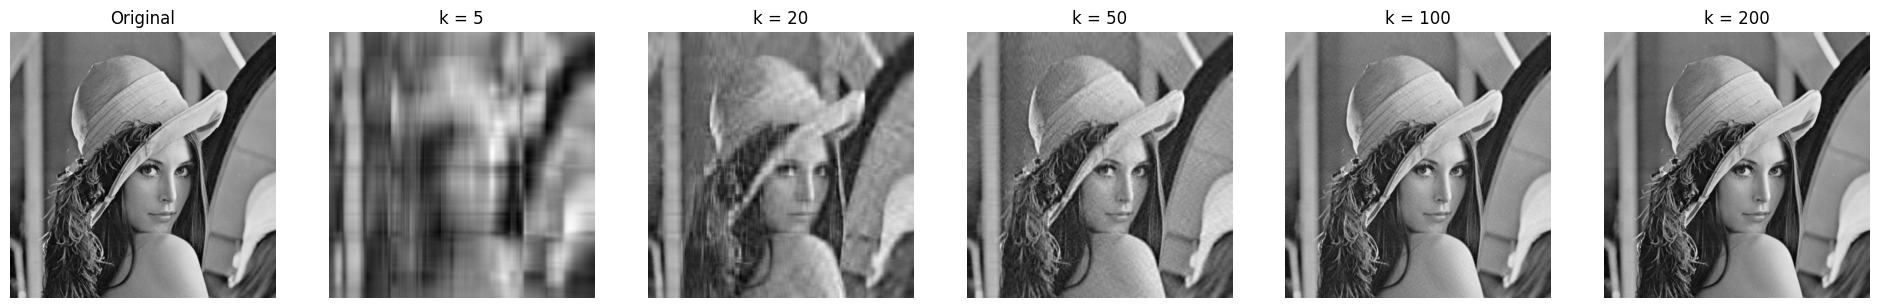

In [64]:
# Write the solution here

import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

# PIL para lectura y conversión a escala de grises
try:
    from PIL import Image
    PIL_AVAILABLE = True
except ImportError:
    PIL_AVAILABLE = False


def load_image_grayscale(path):
    """
    Carga una imagen desde 'path' y devuelve una matriz 2D (float, rango 0-1)
    Si la imagen está en color, la convierte a escala de grises
    """
    if PIL_AVAILABLE:
        im = Image.open(path)
        im = im.convert('L')  # 'L' = modo 8 bits en escala de grises
        arr = np.array(im).astype(np.float64)
        if arr.max() > 1:
            arr /= 255.0  # Normalizar a [0, 1]
        return arr
    else:
        im = plt.imread(path)
        # Si es RGB, convertir manualmente a grises
        if im.ndim == 3:
            if im.max() > 1:
                im = im / 255.0
            arr = np.dot(im[..., :3], [0.2989, 0.5870, 0.1140])
        else:
            arr = im.astype(np.float64)
            if arr.max() > 1:
                arr /= 255.0
        return arr


def compute_svd(img):
    #Aplica SVD a la matriz de la imagen y devuelve U, S y V^T
    U, S, Vt = np.linalg.svd(img, full_matrices=False)
    return U, S, Vt


def reconstruct_from_svd(U, S, Vt, k):
    """
    Reconstruye la imagen usando solo los primeros k valores singulares
    Esto reduce la cantidad de información utilizada
    """
    Uk = U[:, :k]
    Sk = S[:k]
    Vtk = Vt[:k, :]
    recon = (Uk * Sk) @ Vtk
    return np.clip(recon, 0.0, 1.0)  # Mantener valores dentro de [0, 1]

# ------------------------------
# Métricas de calidad
# ------------------------------

def mse(a, b):
    #Calcula el Error Cuadrático Medio (MSE) entre dos imágenes
    return np.mean((a - b) ** 2)

def psnr(a, b, data_range=1.0):
    #Calcula el PSNR
    error = mse(a, b)
    if error == 0:
        return float('inf')
    return 10 * np.log10((data_range ** 2) / error)

# ------------------------------
# Cálculo de compresión
# ------------------------------

def compression_stats(m, n, k):
    """
    Calcula estadísticas de compresión:
    - Tamaño original
    - Tamaño comprimido
    - Ratio de compresión
    - Porcentaje de ahorro
    """
    original = m * n
    compressed = k * (m + n + 1)
    ratio = compressed / original
    saved_pct = 100 * (1 - ratio)
    return original, compressed, ratio, saved_pct

# ------------------------------
# Visualización
# ------------------------------

def plot_side_by_side(original, reconstructions, ks, cmap='gray'):
    #Muestra la imagen original junto a varias versiones comprimidas
    n = 1 + len(reconstructions)
    plt.figure(figsize=(4 * n, 4))
    plt.subplot(1, n, 1)
    plt.imshow(original, cmap=cmap)
    plt.title("Original")
    plt.axis('off')
    for i, (r, k) in enumerate(zip(reconstructions, ks), start=2):
        plt.subplot(1, n, i)
        plt.imshow(r, cmap=cmap)
        plt.title(f"k = {k}")
        plt.axis('off')
    plt.show()

def plot_singular_values(S, max_k=100):
    #Dibuja los primeros valores singulares y la energía acumulada
    vals = S[:max_k]
    energy = np.cumsum(S**2) / np.sum(S**2)
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ax[0].plot(np.arange(1, len(vals)+1), vals, marker='o')
    ax[0].set_title('Primeros valores singulares')
    ax[0].set_xlabel('i')
    ax[0].set_ylabel('σ_i')

    ax[1].plot(np.arange(1, len(S)+1), energy, marker='.')
    ax[1].axhline(0.9, color='k', linestyle='--', label='90% energía')
    ax[1].set_title('Energía acumulada (S^2)')
    ax[1].set_xlabel('k')
    ax[1].set_ylabel('Fracción de energía')
    ax[1].legend()
    plt.show()

# ---------------------------------------------------------
# PROGRAMA PRINCIPAL
# ---------------------------------------------------------

if __name__ == "__main__":

    # Imagen de prueba: Lena
    url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
    image_filename = "lena.png"
    if not os.path.exists(image_filename):
        print("Descargando imagen de prueba...")
        urllib.request.urlretrieve(url, image_filename)
        print("Descarga completada:", image_filename)

    # Cargar en escala de grises
    img = load_image_grayscale(image_filename)
    print("Imagen cargada. shape =", img.shape, "rango =", (img.min(), img.max()))

    # Paso 1: Aplicar SVD
    U, S, Vt = compute_svd(img)
    print("Shapes: U:", U.shape, "S:", S.shape, "Vt:", Vt.shape)

    # Visualizar valores singulares
    plot_singular_values(S, max_k=min(100, len(S)))

    # Paso 2: Reconstrucciones con distintos k
    min_dim = min(img.shape)
    ks = [5, 20, 50, 100, 200]
    ks = [k for k in ks if k <= min_dim]
    if not ks:
        ks = [max(1, min_dim//4), max(1, min_dim//2), min_dim]

    reconstructions = []
    m, n = img.shape

    for k in ks:
        recon = reconstruct_from_svd(U, S, Vt, k)
        reconstructions.append(recon)

        # Métricas y estadísticas
        _mse = mse(img, recon)
        _psnr = psnr(img, recon)
        orig, comp, ratio, saved = compression_stats(m, n, k)

        print(f"k={k:4d} | MSE={_mse:.4e} | PSNR={_psnr:.2f} dB | "
              f"comp_ratio={ratio:.4f} | ahorro={saved:.2f}%")

    # Paso 3: Mostrar resultados
    plot_side_by_side(img, reconstructions, ks)

## Summary

In this section we have seen how to using Numpy:

- Manipulate matrices;
- Solve linear systems;
- Compute Matrix inverses and determinants.

This again just touches on the capabilities of Numpy. For more information please refer to this [Python tutorial.](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb)